In [184]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [185]:
results = pd.read_csv('data/tournament_training_results.csv')

def n_hits(game):
    f = open(f'data/self_train_game_logs/game_{game}_log.csv', 'r')
    hits = 0
    for l in f.readlines():
        for s in l.split('/'):
            if '25' in s:
                hits += 1
    return hits


In [186]:
hits = [n_hits(i) for i in range(len(results.index[:724]))]
hits_df = pd.DataFrame(hits,columns=['hits'])
hits_df['group'] = hits_df.index // n
hits_avg = hits_df.groupby('group').median()

plt.plot(range(len(hits_avg)), hits_avg)

FileNotFoundError: [Errno 2] No such file or directory: 'data/self_train_game_logs/game_0_log.csv'

In [187]:
plt.plot(range(len(results)), results['plys'])

KeyError: 'plys'

In [218]:
n = 1000
results = pd.read_csv('data/tournament_training_results.csv')

results2 = results.copy()
results2['group'] = results2.index // n

In [208]:
results2

,game,avg_loss,final_loss,group
0,0,0.067215,1.434710,0
1,1,0.014540,0.583062,0
2,2,0.042239,1.893565,0
3,3,0.076116,1.629536,0
4,4,0.043159,1.778559,0
...,...,...,...,...
148746,148746,0.125946,0.408737,148
148747,148747,0.090927,0.083182,148
148748,148748,0.178028,1.488124,148
148749,148749,0.070939,0.043081,148


In [213]:
grouped_results = results2.groupby('group').median()

In [214]:
grouped_results

,game,avg_loss,final_loss
group,,,
0,499.5,0.072504,1.091591
1,1499.5,0.112589,0.863715
2,2499.5,0.119566,0.749852
3,3499.5,0.128607,0.723920
4,4499.5,0.129175,0.709624
...,...,...,...
144,144499.5,0.144823,0.454406
145,145499.5,0.139446,0.396303
146,146499.5,0.142640,0.448797


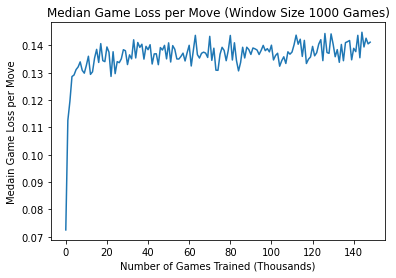

In [215]:
plt.plot(range(len(grouped_results)), grouped_results['avg_loss'])
plt.title('Median Game Loss per Move (Window Size 1000 Games)')
plt.ylabel('Medain Game Loss per Move')
plt.xlabel('Number of Games Trained (Thousands)')
plt.show()

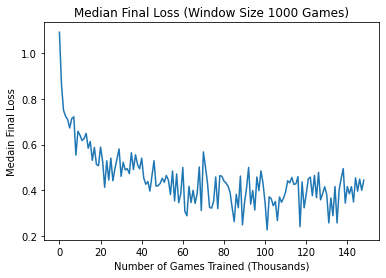

In [216]:
plt.plot(range(len(grouped_results)), grouped_results['final_loss'])
plt.title('Median Final Loss (Window Size 1000 Games)')
plt.ylabel('Medain Final Loss')
plt.xlabel('Number of Games Trained (Thousands)')
plt.show()

In [206]:
np.array([2,1,-1,-2]) @ np.array([0.5,0,0,0.5])

0.0

In [245]:
results = pd.read_csv('data/training_results.csv')
n = 10
results2 = results.copy()
results2['group'] = results2.index // n
results2 = results2.iloc[:-1]
grouped_results = results2.groupby('group').median()

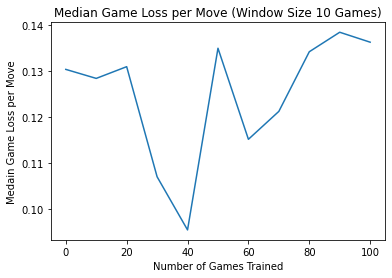

In [249]:
plt.plot([10 * i for i in range(len(grouped_results))], grouped_results['avg_loss'])
plt.title('Median Game Loss per Move (Window Size 10 Games)')
plt.ylabel('Medain Game Loss per Move')
plt.xlabel('Number of Games Trained')
plt.show()

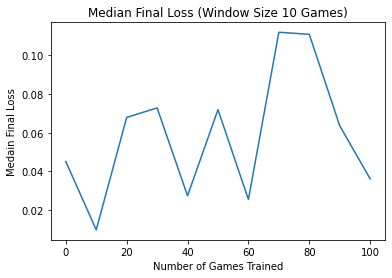

In [250]:
plt.plot([10 * i for i in range(len(grouped_results))], grouped_results['final_state_loss'])
plt.title('Median Final Loss (Window Size 10 Games)')
plt.ylabel('Medain Final Loss')
plt.xlabel('Number of Games Trained')
plt.show()

In [288]:
def score_match_from_log(path):
    
    match1 = pd.read_csv(path)
    match1['final_value'] = match1.apply(lambda x: [int(i) for i in x['final_value'][1:-1].split()], axis=1)
    names = set(match1['winner'].values)
    points = {}
    for n in names:
        points[n] = 0
    
    for i in range(len(match1)):
        points[match1.iloc[i]['winner']] += np.sum(np.array([2, 1, 1, 2]) * np.array(match1.iloc[i]['final_value']))
    
    return points, len(match1)

In [289]:
score_match_from_log('data/training_competition_results_tournament_vs_untrained.csv')

({'untrained': 23, 'match_log_trained': 35}, 49)

In [290]:
score_match_from_log('data/training_competition_results_tournament_vs_self_play.csv')

({'match_log_trained': 21, 'self_trained': 30}, 46)